#### Use GrabCut to Segment the Image

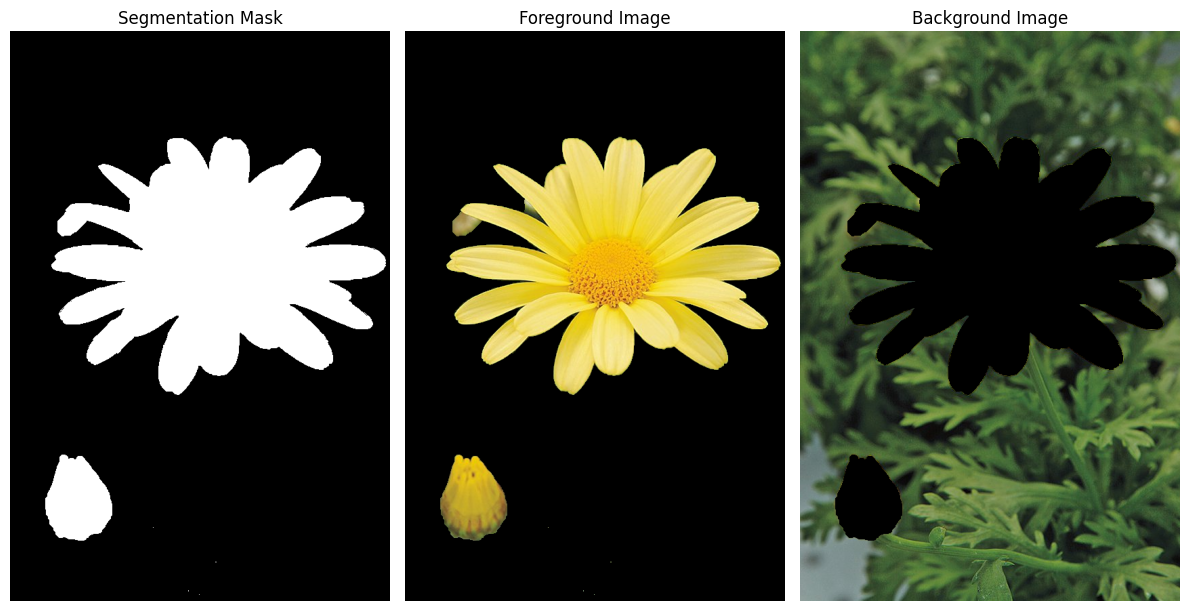

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
image_path = "E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/daisy.jpg"  
daisy_img = cv.imread(image_path)
assert daisy_img is not None, "Image not found."
daisy_img_rgb = cv.cvtColor(daisy_img, cv.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(daisy_img.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle for the GrabCut algorithm
rect = (50, 50, daisy_img.shape[1]-50, daisy_img.shape[0]-50)

# Apply the GrabCut algorithm
cv.grabCut(daisy_img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask: probable and definite foreground are set to 1, others to 0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the segmented foreground
foreground = daisy_img_rgb * mask2[:, :, np.newaxis]

# Extract the background (everything outside the foreground)
background = daisy_img_rgb * (1 - mask2[:, :, np.newaxis])

# Plot the segmentation mask, foreground, and background
plt.figure(figsize=(12, 8))

# Segmentation Mask
plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

# Foreground Image
plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')

# Background Image
plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title('Background Image')
plt.axis('off')

plt.tight_layout()
plt.show()


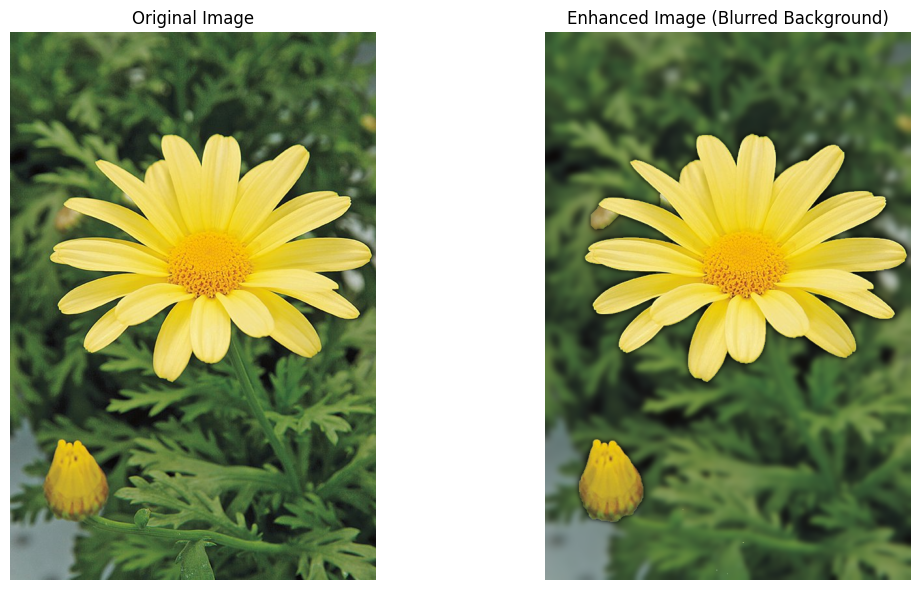

In [2]:
# Apply Gaussian Blur to the background
blurred_background = cv.GaussianBlur(background, (25, 25), 0)

# Combine the sharp foreground with the blurred background
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, daisy_img_rgb, blurred_background)

# Plot the original image alongside the enhanced image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(daisy_img_rgb)
plt.title('Original Image')
plt.axis('off')

# Enhanced Image (Blurred Background)
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced Image (Blurred Background)')
plt.axis('off')

plt.tight_layout()
plt.show()


Why is the background just beyond the edge of the flower quite dark in the enhanced image?


Influence of Neighboring Pixels: When applying a Gaussian blur, the kernel computes the new pixel values based on a weighted average of neighboring pixels. Since the pixels near the edge of the flower (the foreground) are darker than the surrounding area, these darker pixels influence the blurred value of the background pixels just beyond the flower's edge.